In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

## logistic regression 
import statsmodels.api as sm


In [2]:
df = pd.read_csv('activity.csv')
df.columns = ['independent', 'responce']
df.head(6)

,independent,responce
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0
5,19.292,1


In [3]:
## Defining the dependent and independent variable
X = df[['independent']]
y = df[['responce']]

## Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 1), (149, 1), (345, 1), (149, 1))

In [4]:
##
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.460461
         Iterations 6


In [5]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               responce   No. Observations:                  345
Model:                          Logit   Df Residuals:                      344
Method:                           MLE   Df Model:                            0
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.3352
Time:                        07:40:18   Log-Likelihood:                -158.86
converged:                       True   LL-Null:                       -238.96
Covariance Type:            nonrobust   LLR p-value:                       nan
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
independent    -0.0291      0.003     -9.173      0.000      -0.035      -0.023
===============================================================================
"""

In [6]:
# performing predictions on the test dataset
y_pred = log_reg.predict(X_test)
prediction = list(map(round, y_pred))
  
# comparing original and predicted values of y
print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), a

In [7]:
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[72  0]
 [48 29]]
Test accuracy =  0.6778523489932886


In [8]:
clf = LogisticRegression().fit(X_train, y_train.values.ravel())

[[-0.1177466]]
accuracy score: 0.9798657718120806
# of iterations 22
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.97      0.99      0.98        77

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149



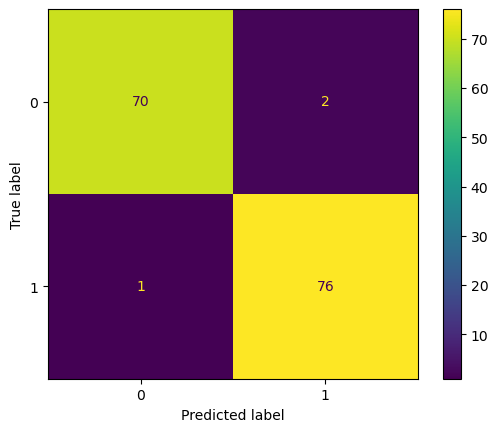

In [9]:
## Obtaining predictions
y_pred = clf.predict(X_test)

# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
# Display the confusion matrix

print(clf.coef_)
print('accuracy score: %s' % clf.score(X_test, y_test))
print('# of iterations %s' % clf.n_iter_[0])
print(classification_report(y_test, y_pred))
disp.plot();